In [1]:
import numpy as np
import  random

## Implémentation ds Algorithmes A* et Greedy-Best_Search sur le jeu du N_Puzzle (Taquin)

 ## *  Reprenez le jeu du Taquin vu en cours et définissez quelques heuristiques propres à ce jeu.

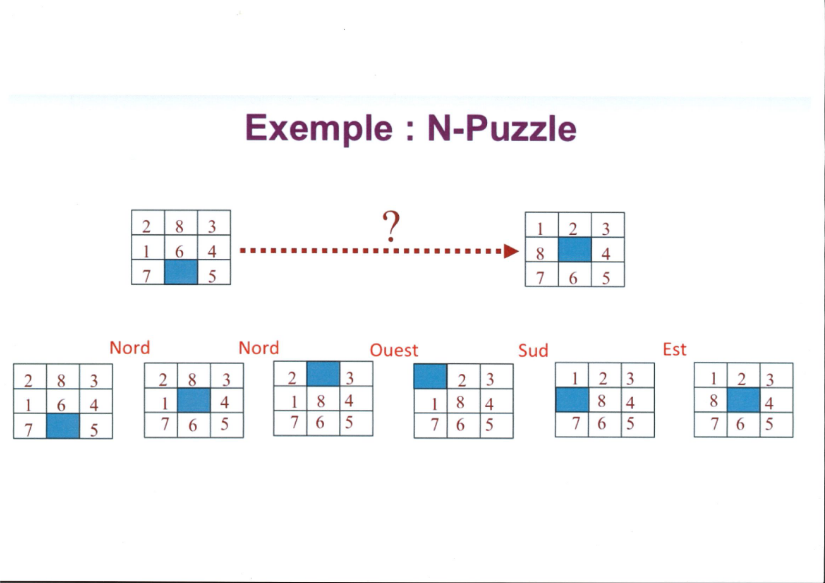

Le but du travail consiste à comparer les deux méthodes sur diverses configurations du jeu du taquin (3x3, 4x4, 5x5, etc) avec diverses situations initiales et finales et en appliquant les différentes heuristiques choisies.


La comparaison des deux méthodes se fera suivant les métriques suivantes:

    - Nombre de nœuds explorés avant de trouver la solution.
    - Qualité de la solution (longueur du chemin ; chemin optimal ou chemin approché, etc)

 ## Les N_puzzle

In [28]:
n=3

In [49]:
def make_puzzle(n):
    puzzle = []
    for i in range(0,n):
        temp = input().split(" ")
        puzzle.append(temp)
    return puzzle
    

## Le départ 

In [50]:
depart=make_puzzle(n)

1 2 3 
_ 5 7
8 1 4


## l'arrivée

In [67]:
but = make_puzzle(n)

1 2 3
_ 5 7
8 1 4


In [103]:
"""
    Function qui permet de calculer le meilleur chemin ayant mené au neud n 
    depuis le noeud initial

"""
def g(depart,but,n):
    cout = 0
    for i in range(0,n):
        for j in range(0,n):
            if depart[i][j] != but[i][j] and depart[i][j] != '_':
                cout += 1
    return cout

"""
    Function qui permet de calculer le coût estimé du reste du chemin optimal partant
    de n jusqu'au but 
"""
def h():
    return None
"""
    Function qui permet de calculer le chemin optimal pour arriver au but
    f(x) = g(x) + h(x)
"""
def f(depart,but,n):
    return g(depart,but,n)

"""
    Function qui permet d'afficher 
"""
def afficher_un_node(node):
    for i in node:
        for j in i:
            print(j,end=" ")
        print("")
    

## * Appliquez les Algorithmes A* et Greedy-Best_Search sur ces différentes heuristiques.

# jeu d'essaie

## Algorithme A*

In [110]:
liste_opened=[]
liste_closed=[]

eval_int= f(depart,but,n)
node=(depart,eval_int,0) # node données , f et h
liste_opened.append(node)
while True:
    node_currant = liste_opened[0]
    afficher_un_node(node_currant[0])
    print("")
    print("                        \\")
    print("---------------------- ")
    print("                        /")
    if(h(node_currant[0],node_currant[2]) == 0):
                break

1 2 3  
_ 5 7 
8 1 4 

                        \
---------------------- 
                        /


TypeError: h() takes 0 positional arguments but 2 were given

In [40]:
class Node:
    def __init__(self,data,level,fval):
        """ Initialize the node with the data, level of the node and the calculated fvalue """
        self.data = data
        self.level = level
        self.fval = fval

    def generate_child(self):
        """ Generate child nodes from the given node by moving the blank space
            either in the four directions {up,down,left,right} """
        x,y = self.find(self.data,'_')
        """ val_list contains position values for moving the blank space in either of
            the 4 directions [up,down,left,right] respectively. """
        val_list = [[x,y-1],[x,y+1],[x-1,y],[x+1,y]]
        children = []
        for i in val_list:
            child = self.shuffle(self.data,x,y,i[0],i[1])
            if child is not None:
                child_node = Node(child,self.level+1,0)
                children.append(child_node)
        return children
        
    def shuffle(self,puz,x1,y1,x2,y2):
        """ Move the blank space in the given direction and if the position value are out
            of limits the return None """
        if x2 >= 0 and x2 < len(self.data) and y2 >= 0 and y2 < len(self.data):
            temp_puz = []
            temp_puz = self.copy(puz)
            temp = temp_puz[x2][y2]
            temp_puz[x2][y2] = temp_puz[x1][y1]
            temp_puz[x1][y1] = temp
            return temp_puz
        else:
            return None
            

    def copy(self,root):
        """ Copy function to create a similar matrix of the given node"""
        temp = []
        for i in root:
            t = []
            for j in i:
                t.append(j)
            temp.append(t)
        return temp    
            
    def find(self,puz,x):
        """ Specifically used to find the position of the blank space """
        for i in range(0,len(self.data)):
            for j in range(0,len(self.data)):
                if puz[i][j] == x:
                    return i,j


class Puzzle:
    def __init__(self,size):
        """ Initialize the puzzle size by the specified size,open and closed lists to empty """
        self.n = size
        self.open = []
        self.closed = []

    def accept(self):
        """ Accepts the puzzle from the user """ # ok
        puz = []
        for i in range(0,self.n):
            temp = input().split(" ")
            puz.append(temp)
        return puz

    def f(self,start,goal):
        """ Heuristic Function to calculate hueristic value f(x) = h(x) + g(x) """
        return self.h(start.data,goal)+start.level

    def h(self,start,goal):
        """ Calculates the different between the given puzzles """
        temp = 0
        for i in range(0,self.n):
            for j in range(0,self.n):
                if start[i][j] != goal[i][j] and start[i][j] != '_':
                    temp += 1
        return temp
        

    def process(self):
        """ Accept Start and Goal Puzzle state"""
        print("Enter the start state matrix \n")
        start = self.accept()
        print("Enter the goal state matrix \n")        
        goal = self.accept()

        start = Node(start,0,0)
        start.fval = self.f(start,goal)
        """ Put the start node in the open list"""
        self.open.append(start)
        print("\n\n")
        while True:
            cur = self.open[0]
            print("")
            print("  | ")
            print("  | ")
            print(" \\\'/ \n")
            for i in cur.data:
                for j in i:
                    print(j,end=" ")
                print("")
            """ If the difference between current and goal node is 0 we have reached the goal node"""
            if(self.h(cur.data,goal) == 0):
                break
            for i in cur.generate_child():
                i.fval = self.f(i,goal)
                self.open.append(i)
            self.closed.append(cur)
            del self.open[0]

            """ sort the opne list based on f value """
            self.open.sort(key = lambda x:x.fval,reverse=False)


In [41]:
puz = Puzzle(3)
puz.process()

Enter the start state matrix 

1 2 3
_ 4 6
7 5 8
Enter the goal state matrix 

1 2 3
4 5 6
7 8 _




  | 
  | 
 \'/ 

1 2 3 
_ 4 6 
7 5 8 

  | 
  | 
 \'/ 

1 2 3 
4 _ 6 
7 5 8 

  | 
  | 
 \'/ 

1 2 3 
4 5 6 
7 _ 8 

  | 
  | 
 \'/ 

1 2 3 
4 5 6 
7 8 _ 
